In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf

In [2]:
file_list = ['J2017_LRIS_spectra/J2017_coadd2d_sp_blue.fits', 'J2017_LRIS_spectra/J2017_coadd2d_var_blue.fits',
             'J2017_LRIS_spectra/J2017_coadd2d_sp_red.fits', 'J2017_LRIS_spectra/J2017_coadd2d_var_red.fits']

In [9]:
spec_b = spec2d.Spec2d(file_list[0], hext=0, invar=file_list[1], ytrim=[100, 320])
spec_r = spec2d.Spec2d(file_list[2], hext=0, invar=file_list[3])#, ytrim=[30, 120])


Loading file J2017_LRIS_spectra/J2017_coadd2d_sp_blue.fits
-----------------------------------------------

Loading file J2017_LRIS_spectra/J2017_coadd2d_var_blue.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2017_LRIS_spectra/J2017_coadd2d_sp_blue.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 100:321
Final data dimensions (x y): 4096 x 221

Dispersion axis:              x
N_pixels along dispersion axis: 4096


Loading file J2017_LRIS_spectra/J2017_coadd2d_sp_red.fits
-----------------------------------------------

Loading file J2017_LRIS_spectra/J2017_coadd2d_var_red.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2017_LRIS_spectra/J2017_coadd2d_sp_red.fits (HDU=0)
Final data dimensions (x y): 4128 x 501

Dispersion axis:              x
N_pixels along dispersion axis: 4128



Profile max value (before normalization) 28.553939


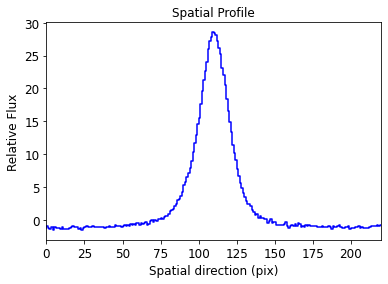


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 28, 108, 3, 4

amplitude=28.000000, x_0=108.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Polynomial1D(0, c0=-1.11519412)>

    [1]: <Moffat1D(amplitude=29.55174686, x_0=110.57191824, gamma=16.96605731, alpha=1.94978727)>
Parameters:
            c0_0           amplitude_1    ...      gamma_1            alpha_1      
    ------------------- ----------------- ... ------------------ ----------------

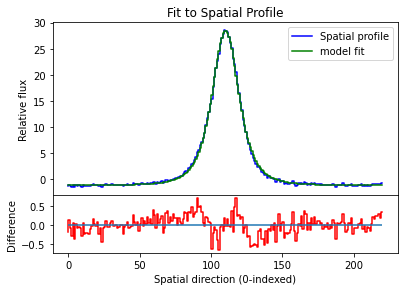

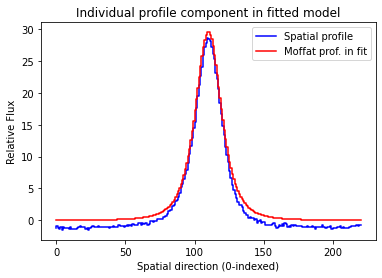


Do you want to start over ? : type yes/no
no


In [54]:
spec_b.spatial_profile(pixrange=[2100, 2400])
plt.show()
mod0 = spec_b.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.4247951)>

    [1]: <Moffat1D(amplitude=13.36345088, x_0=116.43468222, gamma=9.1421779, alpha=1.40513775)>

    [2]: <Moffat1D(amplitude=5.04360965, x_0=99.94106969, gamma=5.98598344, alpha=0.76147108)>

    [3]: <Moffat1D(amplitude=21.46740724, x_0=108.69745656, gamma=6.25587897, alpha=0.78647153)>
Parameters:
            c0_0           amplitude_1     ...      gamma_3           alpha_3     
    ------------------- ------------------ ... ----------------- -----------------
    -1.4247951036063258 13.363450881094758 ... 6.255878966305878 0.786471530384881

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.1617143)>

    [1]: <Moffat1D(amplitu

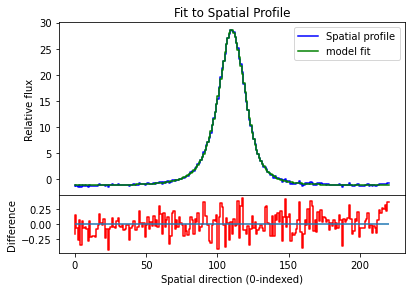

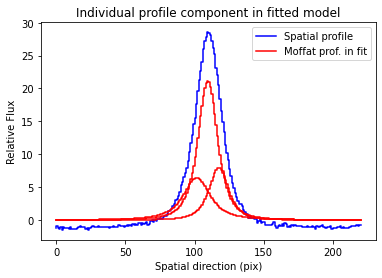

In [15]:
def tie_pos1_moffat(model):
     return model.x_0_1 - 16
            
def tie_pos2_moffat(model):
    return model.x_0_1 - 8

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#for sp in spec_list:
#spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec_b.mod0[2].x_0.tied = tie_pos1_moffat
spec_b.mod0[3].x_0.tied = tie_pos2_moffat
#spec1.mod0[2].gamma.tied = tie_gamma_moffat
#spec1.mod0[2].alpha.tied = tie_alpha_moffat
spec_b.mod0[3].gamma.tied = tie_gamma_moffat
spec_b.mod0[3].alpha.tied = tie_alpha_moffat
spec_b.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1


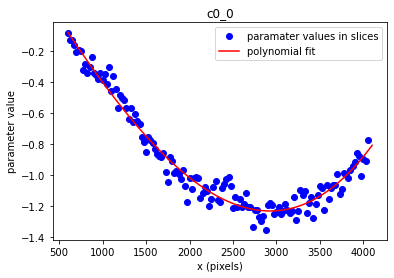

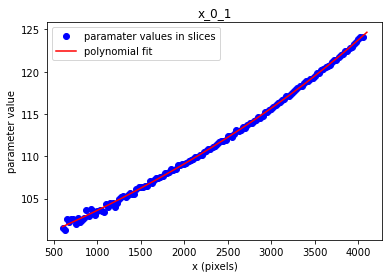

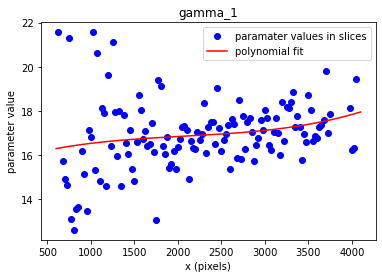

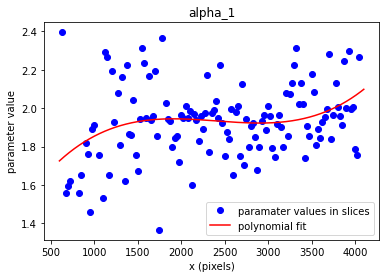

In [55]:
spec_b.find_and_trace(spec_b.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'mean_1':4},
                    fitrange=[600, 4100], polyorder=3)
plt.show()

Fitting to 1 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  3056.33
 Spectrum End:     5554.28
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61


Plotting the spectrum


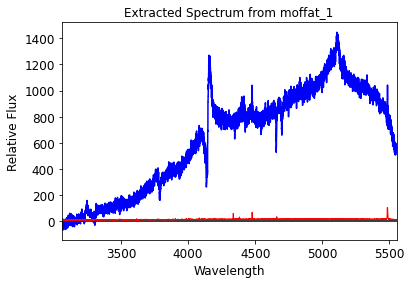

In [56]:
spec_b.extract(method='modelfit', extrange=[0, -1])
plt.show()

 Spectrum Start:  3056.33
 Spectrum End:     5553.67
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Fe II         2587.00       3065.60
Fe II         2600.00       3081.00
Fe II         2750.30       3259.11
Mg II         2795.53       3312.70
Mg II         2802.71       3321.21
Mg I          2852.00       3379.62
H-kappa       3750.00       4443.75
[Fe VII]      3761.40       4457.26
H-iota        3770.00       4467.45
H-theta       3797.00       4499.45
H-eta         3835.00       4544.48
CN bandhd     3883.00       4601.36
CaII K        3933.67       4661.40
CaII H        3968.47       4702.64
H-delta       4101.00       4859.69
G-band        4305.00       5101.43
H-gamma       4340.00       5142.90
Fe4383        4383.00       5193.86
Ca4455        4455.00       5279.18
Fe4531        4531.00       5369.24



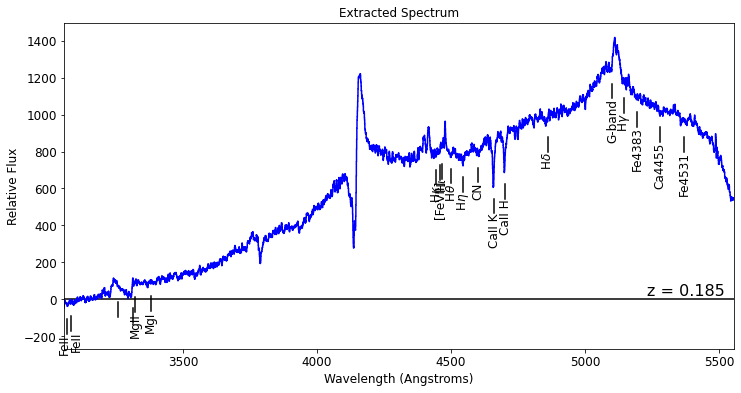

In [64]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_b.spectra[0][1]['flux'][0:-1], wav=spec_b.spectra[0][1]['wav'][0:-1])
sp.smooth(5, fig=fg)
#sp.mark_lines('strongem', z=1.72, usesmooth=True, markatm=False)
sp.mark_lines('abs', z=0.185, usesmooth=True, markatm=False)

 Spectrum Start:  3056.33
 Spectrum End:     5493.28
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61



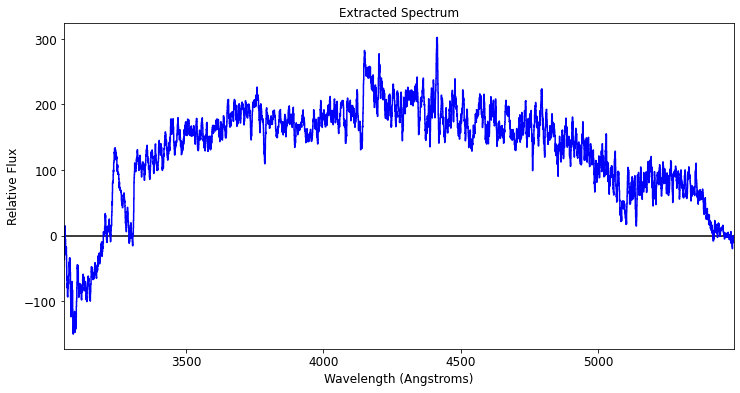

In [33]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_b.spectra[1][1]['flux'][0:-100], wav=spec_b.spectra[1][1]['wav'][0:-100])
sp.smooth(9, fig=fg)
#sp.mark_lines('strongem', z=1.72, usesmooth=True, markatm=False)
# sp.mark_lines('abs', z=1.72, usesmooth=True)

 Spectrum Start:  3971.33
 Spectrum End:     5553.67
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61



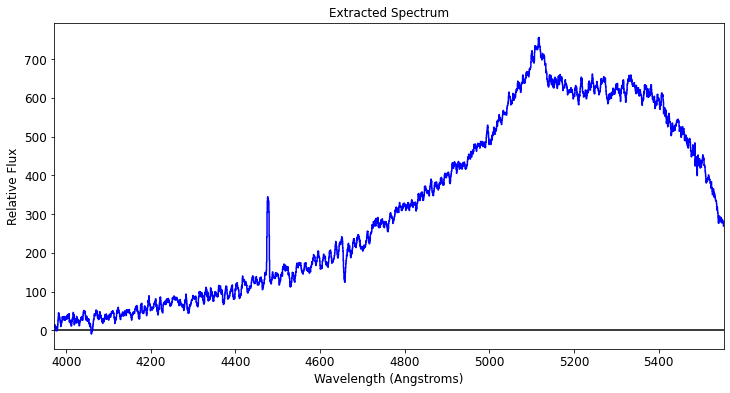

In [38]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_b.spectra[0][1]['flux'][1500:-1], wav=spec_b.spectra[0][1]['wav'][1500:-1])
sp.smooth(9, fig=fg)
#sp.mark_lines('strongem', z=1.72, usesmooth=True, markatm=False)
# sp.mark_lines('abs', z=1.72, usesmooth=True)

Profile max value (before normalization) 123.160392


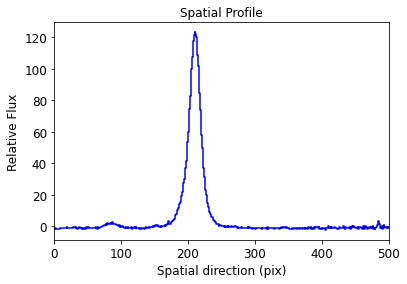


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 2

Now enter constants of the background polynomial upto degree 0
c0 : -2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 20, 210, 3, 4

amplitude=20.000000, x_0=210.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 8, 92, 2, 3

amplitude=8.000000, x_0=92.000000, gamma=2.000000, alpha=3.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.67537723)>

    [1]: <Moffat1D(amplitude=127.77313667, x_0=210.8904654, gamma=8.8471095, alpha=1.01400916)>

    [2]: <Moffat1D(amplitude=3.06617139, x_0=91.57148466, g

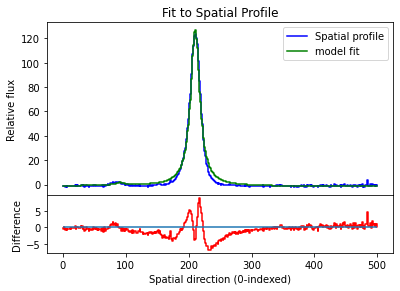

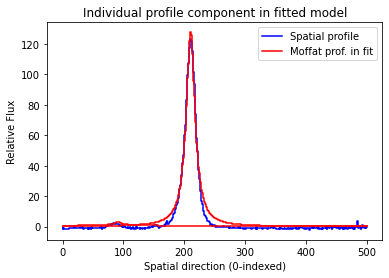


Do you want to start over ? : type yes/no
no


In [44]:
spec_r.spatial_profile(pixrange=[2100, 2400])
plt.show()
mod0 = spec_r.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-1.67537723)>

    [1]: <Moffat1D(amplitude=127.77313667, x_0=210.8904654, gamma=8.8471095, alpha=1.01400916)>

    [2]: <Moffat1D(amplitude=3.06617139, x_0=91.57148466, gamma=3.05165646, alpha=0.23904028)>
Parameters:
            c0_0           amplitude_1     ...       alpha_2      
    ------------------- ------------------ ... -------------------
    -1.6753772339379949 127.77313666909762 ... 0.23904028156346768

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2]
Components: 
    [0]: <Polynomial1D(0, c0=-0.95110374)>

    [1]: <Moffat1D(amplitude=124.54646795, x_0=210.83500294, gamma=14.63836623, alpha=1.90778274)>

    [2]: <Moffat1D(amplitude=3.10627649, x_0=85.83500294, gamma=14.63836623, alpha

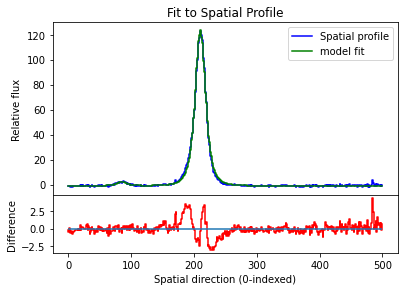

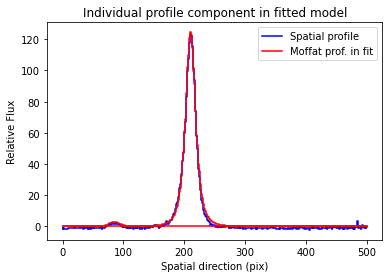

In [45]:
def tie_pos1_moffat(model):
     return model.x_0_1 - 125
            
def tie_pos2_moffat(model):
    return model.x_0_1 - 8

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#for sp in spec_list:
#spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec_r.mod0[2].x_0.tied = tie_pos1_moffat
#spec_r.mod0[3].x_0.tied = tie_pos2_moffat
#spec1.mod0[2].gamma.tied = tie_gamma_moffat
#spec1.mod0[2].alpha.tied = tie_alpha_moffat
spec_r.mod0[2].gamma.tied = tie_gamma_moffat
spec_r.mod0[2].alpha.tied = tie_alpha_moffat
spec_r.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 165 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2


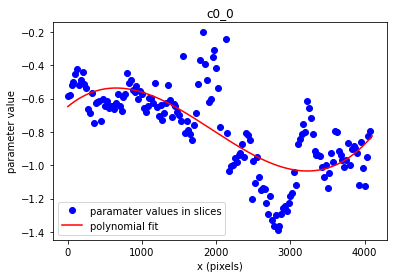

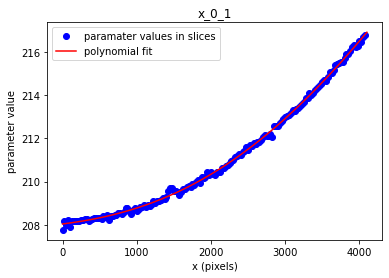

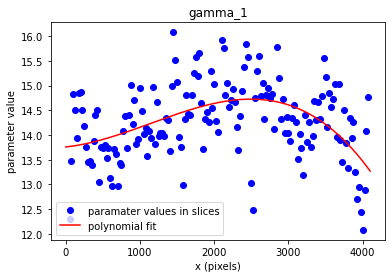

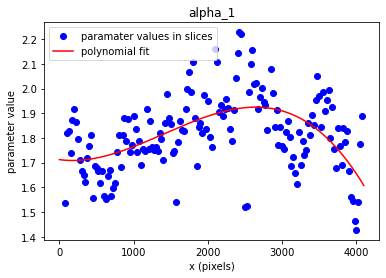

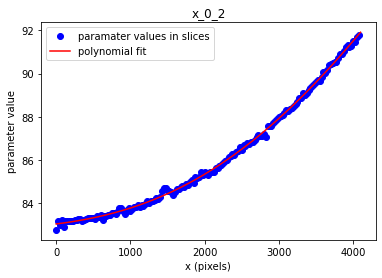

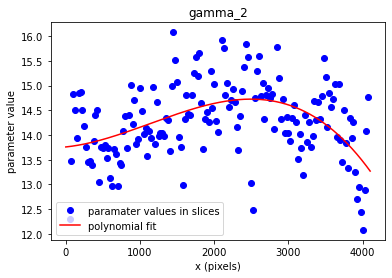

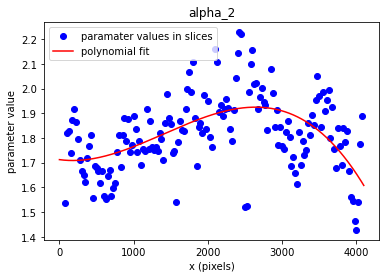

In [46]:
spec_r.find_and_trace(spec_r.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'mean_1':4},
                    fitrange=[0, 4100], polyorder=3)
plt.show()

Fitting to 2 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4128
Fitting to the trace at 4128 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5642.37
 Spectrum End:     8943.97
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  5642.37
 Spectrum End:     8943.97
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


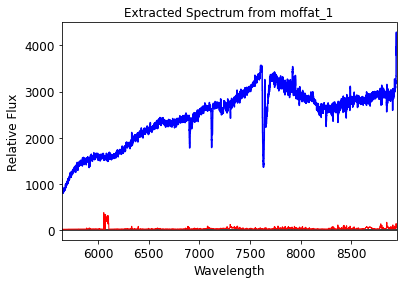

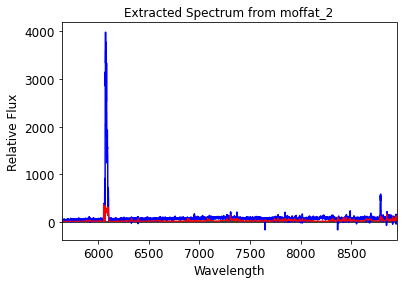

In [47]:
spec_r.extract(method='modelfit', extrange=[0, -1])
plt.show()

 Spectrum Start:  5642.37
 Spectrum End:     8943.17
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Mg II         2799.80       7615.46


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Fe III        2075.00       5644.00
Fe II         2375.00       6460.00
Fe II         2383.00       6481.76
Fe II         2587.00       7036.64
Fe II         2600.00       7072.00
Fe II         2750.30       7480.82
Mg II         2795.53       7603.84
Mg II         2802.71       7623.37
Mg I          2852.00       7757.44



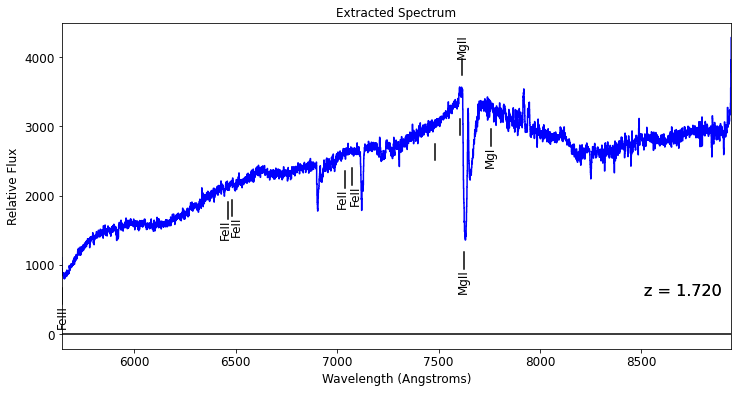

In [50]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_r.spectra[0][1]['flux'][0:-1], wav=spec_r.spectra[0][1]['wav'][0:-1])
sp.smooth(1, fig=fg)
sp.mark_lines('strongem', z=1.72, usesmooth=True, markatm=False)
sp.mark_lines('abs', z=1.72, usesmooth=True, markatm=False)

 Spectrum Start:  5642.37
 Spectrum End:     8943.17
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



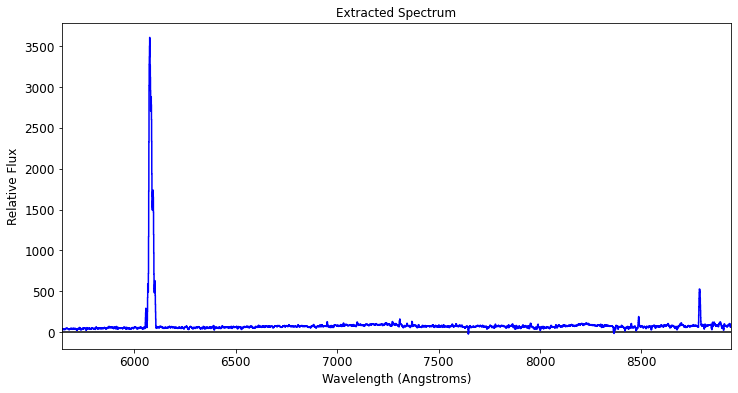

In [53]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_r.spectra[1][1]['flux'][0:-1], wav=spec_r.spectra[1][1]['wav'][0:-1])
sp.smooth(5, fig=fg)
# sp.mark_lines('strongem', z=1.72, usesmooth=True, markatm=False)
# sp.mark_lines('abs', z=1.72, usesmooth=True, markatm=False)